<a href="https://colab.research.google.com/github/Pradnya1208/Intent-classification-based-food-delivery-chatbot/blob/main/Sentence_embedding/food_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 2.7 MB/s 
  Using cached pybind11-2.9.0-py2.py3-none-any.whl (210 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3124484 sha256=bbcd9635f3e3b49c37af293d69e4b3f7f765d09fac7d4120ad1dd1e1460607cd
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import nltk
nltk.download("all")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [14]:
import numpy as np

import json
import fasttext as ft

import fasttext.util as ft1

In [13]:
# -*- coding: utf-8 -*-
"""

@author: Pradnya Patil
"""

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

'''
Since the dataset is small, using NLTK stop words stripped it off many words that were important for this context 
So I wrote a small script to get words and their frequencies in the whole document, and manually selected 
inconsequential words to make this list 
'''

stop_words = ['the', 'you', 'i', 'are', 'is', 'a', 'me', 'to', 'can', 'this', 'your', 'have', 'any', 'of', 'we', 'very',
              'could', 'please', 'it', 'with', 'here', 'if', 'my', 'am']



def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens


def tokenize_and_remove_punctuation(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    return tokens


def remove_stopwords(word_tokens):
    filtered_tokens = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_tokens.append(w)
    return filtered_tokens


'''
Convert to lower case,
remove punctuation
lemmatize
'''


def preprocess_main(sent):
    sent = sent.lower()
    tokens = tokenize_and_remove_punctuation(sent)
    lemmatized_tokens = lemmatize_sentence(tokens)
    orig = lemmatized_tokens
    filtered_tokens = remove_stopwords(lemmatized_tokens)
    if len(filtered_tokens) == 0:
        # if stop word removal removes everything, don't do it
        filtered_tokens = orig
    normalized_sent = " ".join(filtered_tokens)
    return normalized_sent


In [ ]:
"""import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')"""

In [ ]:
#from gensim.models.wrappers import FastText 


In [30]:
def parse_data(ft_model):
    with open("intents.json") as file:
        data = json.load(file)

    embedded_patterns = []
    for intent in data['intents']:

        for pattern in intent['patterns']:
            pattern = preprocess_main(pattern)
            embedded_sentence = embed_sentence(pattern, ft_model)
            #[model_gensim[word] for word in sentence_obama]

            embedded_patterns.append(embedded_sentence)
        intent['patterns'] = np.array(embedded_patterns).tolist()


    return data


def embed_sentence(sentence, ft_model):
    #sentence_vec= [ft_model[word] for word in sentence]
    sentence_vec = ft_model.get_sentence_vector(sentence)
    return sentence_vec


def write_embedded_data(data):
    json_object = json.dumps(data, indent=4)

    with open("embedded_data.json", "w") as outfile:
        outfile.write(json_object)


def load_embedding_model():
    #ft_model = FastText.load_fasttext_format('cc.en.300.bin')
    ft_model = ft.load_model('cc.en.300.bin')
    #ft1.reduce_model(ft_model, 100)
    return ft_model



    

In [16]:
ft_model = load_embedding_model()
    


In [31]:
embedded_data = parse_data(ft_model)


In [32]:
write_embedded_data(embedded_data) 

## Clusterning of intents

In [34]:
from sklearn.manifold import TSNE
import json
import numpy as np
from sklearn.cluster import KMeans

from yellowbrick.text import TSNEVisualizer

In [36]:
# embedded data has fasttext vectors of the sentences
with open("/content/embedded_data.json") as file:
    data = json.load(file)

X = []

for intent in data['intents']:

    for pattern in intent['patterns']:
      if not (intent['tag'] == 'general'):
        pattern = np.array(pattern)
        X.append(pattern)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* a

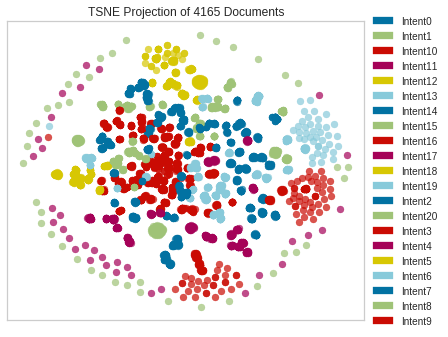

In [39]:
clusters = KMeans(n_clusters=21)
clusters.fit(X)

tsne = TSNEVisualizer()
tsne.fit(X, ["Intent{}".format(c) for c in clusters.labels_])
tsne.poof()